In [2]:
#import standard data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df_players_l = pd.read_csv('df_players_left.csv')
df_players_r = pd.read_csv('df_players_right.csv')
df_players = pd.read_csv('df_players.csv')

In [47]:
#add average splits to df_players

In [49]:
for i in df_players_l.columns:
    print(i)

Unnamed: 0
player_mlb_id
playerID_LAHMAN
birthYear
birthMonth
birthDay
birthCountry
weight
height
bats
throws
debut
birthDate
year
years_after_debut
total_pa
total_bf
base_ended_inn
field_p
field_c
field_1b
field_2b
field_3b
field_ss
field_lf
field_cf
field_rf
batter_strikeout
pitcher_strikeout
batter_caught_stealing_3b
pitcher_caught_stealing_3b
batter_field_out
pitcher_field_out
batter_walk
pitcher_walk
batter_force_out
pitcher_force_out
batter_sac_fly
pitcher_sac_fly
batter_single
pitcher_single
batter_hit_by_pitch
pitcher_hit_by_pitch
batter_double
pitcher_double
batter_grounded_into_double_play
pitcher_grounded_into_double_play
batter_sac_bunt
pitcher_sac_bunt
batter_home_run
pitcher_home_run
batter_fielders_choice
pitcher_fielders_choice
batter_field_error
pitcher_field_error
batter_other_out
pitcher_other_out
batter_caught_stealing_2b
pitcher_caught_stealing_2b
batter_triple
pitcher_triple
batter_strikeout_double_play
pitcher_strikeout_double_play
batter_fielders_choice_out
pitc

In [176]:
def get_split_for_stat(df_players, df_players_l, df_players_r, stats):
    #limit to only needed rows
    df_players = df_players[['player_mlb_id','year','total_pa'] + stats]

    #get plate appearances for left/right
    df_l = df_players_l[['player_mlb_id','year','total_pa']]
    df_r = df_players_r[['player_mlb_id','year','total_pa']]
    df_players = df_players.merge(df_l, on=['player_mlb_id','year'], how='left', suffixes=('','_l'))
    df_players = df_players.merge(df_r, on=['player_mlb_id','year'], how='left', suffixes=('','_r'))
    
    #percent of righty vs lefties faces
    df_players['pct_lefty'] = df_players['total_pa_l'] / (df_players['total_pa'])
    
    #add other stats
    for stat in stats:
        df_l = df_players_l[['player_mlb_id','year',stat]]
        df_r = df_players_r[['player_mlb_id','year',stat]]
        df_players = df_players.merge(df_l, on=['player_mlb_id','year'], how='left', suffixes=('','_l'))
        df_players = df_players.merge(df_r, on=['player_mlb_id','year'], how='left', suffixes=('','_r'))

    #calculate split difference
    for stat in stats:
        df_players[f"{stat}_split"] = df_players[f"{stat}_l"] - df_players[f"{stat}_r"]

    #remove players with no plate appearances
    df_players = df_players[df_players['total_pa'] > 0]
    
    return df_players

In [190]:
#change this to get different stats splits
stats_to_check = ['avg','ops']
df_players_check = get_split_for_stat(df_players, df_players_l, df_players_r, stats_to_check)

In [180]:
df_players_check.head()

,player_mlb_id,year,total_pa,avg,total_pa_l,total_pa_r,pct_lefty,avg_l,avg_r,avg_split
1,33438ca2fdf93ff73b2e1bcc5da3058a04cf1661,2021,3,0.333333,1,2,0.333333,0.000000,0.500000,-0.500000
4,80f3a94c7bf1ed6397017744dbb75ff931902e2d,2021,657,0.251273,153,504,0.232877,0.283688,0.241071,0.042617
6,b4246bd7233f08e749626eb0b7647d295f2e37b7,2021,358,0.274510,81,277,0.226257,0.296875,0.268595,0.028280
8,81272c934b63edda7b2c6ca9f268f5a594ce5131,2021,554,0.261569,167,387,0.301444,0.234899,0.272989,-0.038089
13,c296dc19142d27a8a0d4a738256f7423945d04b6,2021,39,0.166667,5,34,0.128205,0.000000,0.181818,-0.181818


<Axes: xlabel='pct_lefty', ylabel='Count'>

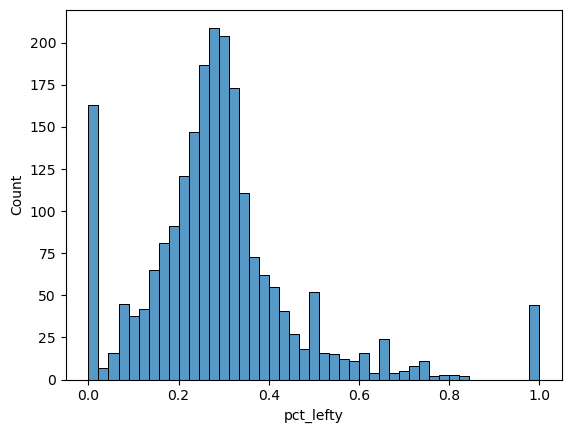

In [182]:
sns.histplot(df_players_check['pct_lefty'])

<Axes: xlabel='pct_lefty', ylabel='Count'>

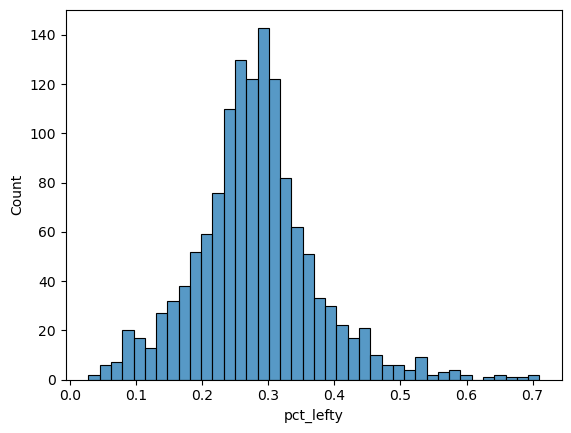

In [194]:
#check for players with at least 50 pa
df_players_100 = df_players_check[df_players_check['total_pa'] >= 100]
sns.histplot(df_players_100['pct_lefty'])

<Axes: xlabel='pct_lefty', ylabel='total_pa'>

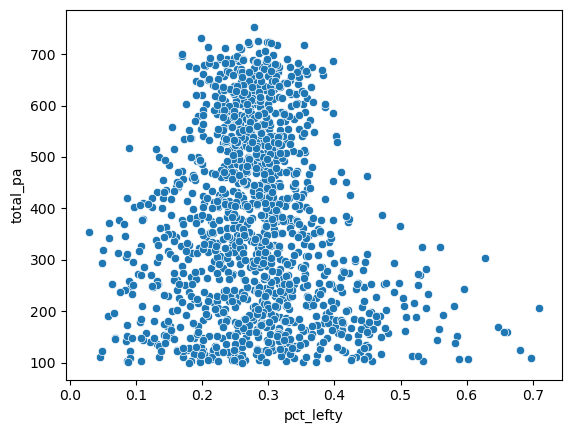

In [195]:
sns.scatterplot(x=df_players_100['pct_lefty'],y=df_players_100['total_pa'])

<Axes: xlabel='avg_split', ylabel='total_pa'>

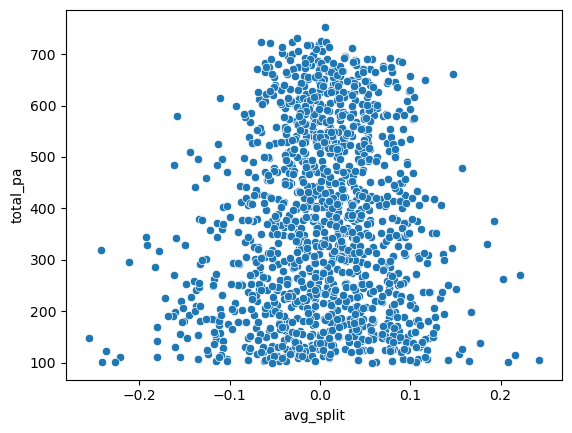

In [197]:
sns.scatterplot(x=df_players_100['avg_split'],y=df_players_100['total_pa'])

<Axes: xlabel='ops_split', ylabel='total_pa'>

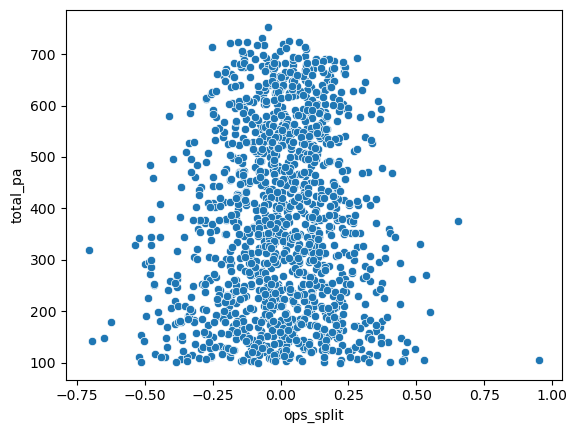

In [199]:
sns.scatterplot(x=df_players_100['ops_split'],y=df_players_100['total_pa'])

<Axes: xlabel='total_pa', ylabel='Count'>

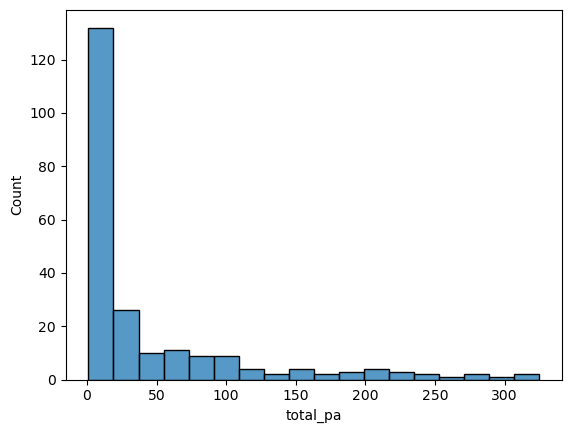

In [216]:
#players who had over 50% of PAs come against lefties
sns.histplot(df_players_check[df_players_check['pct_lefty'] >= .5]['total_pa'])

<Axes: xlabel='total_pa', ylabel='Count'>

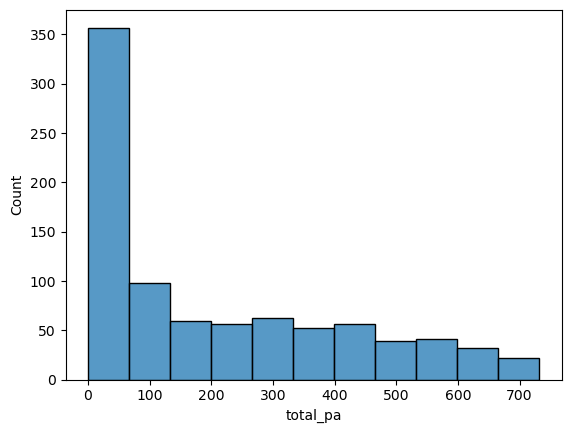

In [222]:
#players who had over 75% of PAs come against righties
sns.histplot(df_players_check[df_players_check['pct_lefty'] <= .25]['total_pa'])

<Axes: xlabel='total_pa', ylabel='Count'>

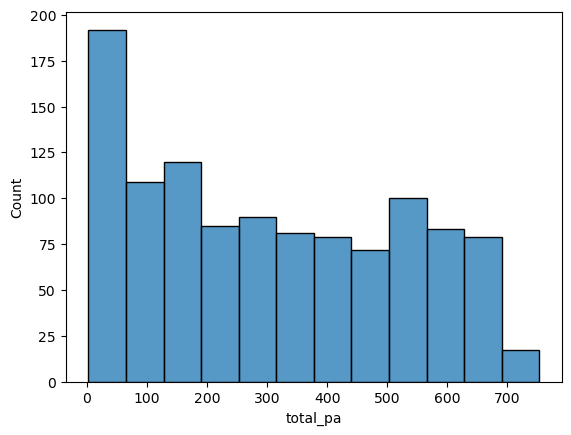

In [220]:
#players in between 25-50% of PAs against lefties
sns.histplot(df_players_check[(df_players_check['pct_lefty'] > .25) & (df_players_check['pct_lefty'] < .5)]['total_pa'])